<a href="https://colab.research.google.com/github/SharuGitHubSpace/SentimentAnalysis/blob/main/ReviewsSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import random
from random import sample
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#Start by connecting gdrive into the google colab

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
objects = []
file = '/content/drive/MyDrive/Dataset/SA-REVIEWS-Dataset.pkl'
with (open(file, "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [ ]:
api_key = ''
with open('/content/drive/MyDrive/Dataset/api_key.txt') as f:
    api_key = f.readlines()
api_key[0]

'09d47ff5-0b47-4fde-af33-bc2fe00886d9'

In [ ]:
def predictedSentiment(data):
    SentancePolaritymaxList = []
    SentancePolaritymaxProbList = []
    output_obj = data
    for i in range(len(output_obj)):
        #print(output_obj[i])
        sentiment = output_obj[i]['extracted'][0][1]
        sentiment
        SentancePolaritymax = max(zip(sentiment.values(), sentiment.keys()))[1]
        SentancePolaritymaxList.append(SentancePolaritymax)
        SentancePolaritymaxProb = max(zip(sentiment.values(), sentiment.keys()))[0]
        SentancePolaritymaxProbList.append(SentancePolaritymaxProb)
    return SentancePolaritymaxList, SentancePolaritymaxProbList

In [ ]:
objects[0][0][0][1:50]

[["During the Tower confirmation debate, White House chief of staff John Sununu spoke of bizarre allegations ''coming in over the transom.''"],
 ["all reviews i've seen seem to indicate that the creative mp3 jukeboxes have the best sound quality of these 2nd generation jukeboxed (ipod, archos, dell, samsung)."],
 ["@anonymous trying not to, but it's gonna be hard! Bloody hard for me!"],
 ['It challenges, this nervy oddity, like modern art should.'],
 ['There are no special effects, and no Hollywood endings.'],
 ["Though overall an overwhelmingly positive portrayal, the film doesn't ignore the more problematic aspects of Brown's life."],
 ['Israel, Palestinians wrap up latest round of peace talks without announcing breakthrough - http://url_removed'],
 ['Programs like School Volunteers help fill the gap, working directly with students during school hours and giving them additional instruction in reading, writing, math, and English as a second language.'],
 ['Everything    even life on a

In [ ]:
def flatten(l):
    return [item for sublist in l for item in sublist]

In [ ]:
# 100 items in 50 loops
import pandas as pd
df = pd.DataFrame()
BATCH_SIZE = 1
chunks = 1000

XList = []
yList = []
# API Configuration
import requests
_url = "148.113.138.69"
_key = api_key[0]
url = "http://" + _url + ":49152/tLM"

for index in range(0, chunks):
    _list = []
    X = objects[0][0][0][index * BATCH_SIZE: (index + 1) * BATCH_SIZE]
    y = objects[0][0][1][index * BATCH_SIZE: (index + 1) * BATCH_SIZE]
    my_lst_str = flatten(X)
    _list.append(my_lst_str)
    input_obj = {'API-KEY': _key, 'X': _list }
    output_obj = requests.post(url, json = input_obj)
    output_obj = output_obj.json()
    pred_y, pred_prob = predictedSentiment(output_obj)
    data = {'sentances': X , 'True Label' : y , 'Pred Label' : pred_y , 'Pred Prob': pred_prob}
    df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)


In [ ]:
df


,sentances,True Label,Pred Label,Pred Prob
0,"[Oedekerk mugs mercilessly, and the genuinely ...",[[Sentiment=Negative]],[Sentiment=Negative],0.978924
1,"[During the Tower confirmation debate, White H...",[[Sentiment=Negative]],[Sentiment=Negative],0.800016
2,[all reviews i've seen seem to indicate that t...,[[Sentiment=Positive]],[Sentiment=Positive],0.930243
3,"[@anonymous trying not to, but it's gonna be h...",[[Sentiment=Negative]],[Sentiment=Negative],0.607008
4,"[It challenges, this nervy oddity, like modern...",[[Sentiment=Positive]],[Sentiment=Positive],0.927426
...,...,...,...,...
9995,[if you want the other accessories the ipod of...,[[Sentiment=Positive]],[Sentiment=VeryNegative],0.930136
9996,[Halloween: Resurrection isn't exactly quality...,[[Sentiment=Neutral]],[Sentiment=Negative],0.855839
9997,[The circumstance contrasts strikingly with ba...,[[Sentiment=Neutral]],[Sentiment=Positive],0.972845
9998,[The production has been made with an enormous...,[[Sentiment=Positive]],[Sentiment=Positive],0.926371


In [ ]:
for i, row in df.iterrows():
    print(df.loc[i,'True Label'][0] )
    df.loc[i,'True Label']  = df.loc[i,'True Label'][0]

In [ ]:
location = '/content/drive/MyDrive/Dataset/'

with pd.ExcelWriter(location+'output_ReviewSA.xlsx') as excel_writer:
    df.to_excel(excel_writer, sheet_name='Review - Sentiment Analysis', index=False)

In [ ]:
df['True Label']

0     [[Sentiment=Negative]]
1     [[Sentiment=Negative]]
2     [[Sentiment=Positive]]
3     [[Sentiment=Negative]]
4     [[Sentiment=Positive]]
               ...          
95    [[Sentiment=Negative]]
96     [[Sentiment=Neutral]]
97    [[Sentiment=Negative]]
98    [[Sentiment=Positive]]
99    [[Sentiment=Positive]]
Name: True Label, Length: 100, dtype: object

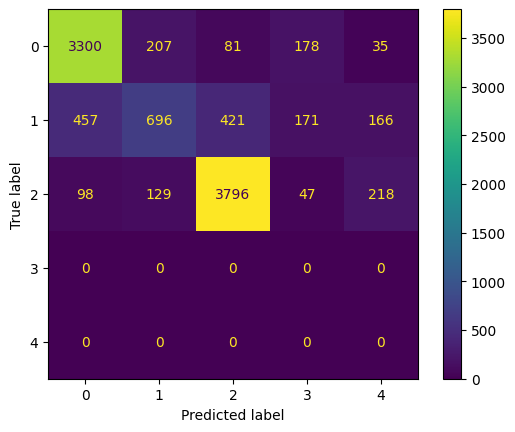

In [ ]:
Labels = ['Sentiment=Negative'  , 'Sentiment=Neutral' , 'Sentiment=Positive' , 'Sentiment=VeryNegative' , 'Sentiment=VeryPositive']
cm = confusion_matrix(df['True Label'], df['Pred Label'] )
disp = ConfusionMatrixDisplay(confusion_matrix=cm  )
disp.plot()